In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn import svm


import time
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [2]:
aviation_data = '/Users/robertreynoso/Desktop/phase_03_project/data//encoded_aviation_data_3.csv'

df = pd.read_csv(aviation_data, encoding='latin-1')

In [3]:
df.columns

Index(['Unnamed: 0', 'target', 'location', 'aircraft_damage', 'make', 'model',
       'number_of_engines', 'engine_type', 'weather_conditions',
       'phase_of_flight', 'Year', 'Month', 'Day', 'injuries', 'pax_onboard',
       'fatality_percentage', 'survived', 'amateur_built'],
      dtype='object')

In [3]:
df = df.drop('Unnamed: 0', axis =1)
df.shape

(48671, 17)

In [5]:
df.head()

,target,location,aircraft_damage,make,model,number_of_engines,engine_type,weather_conditions,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,amateur_built
0,1,1725,0,2963,976,1,0,2,1,1982,6,13,1.0,1.0,0.0,1,0
1,1,7692,0,2963,3852,1,0,2,2,1982,7,1,2.0,2.0,0.0,2,1
2,0,4221,0,2963,6619,1,0,2,0,1982,7,16,1.0,1.0,100.0,0,1
3,1,12735,0,2963,4236,1,0,2,6,1982,8,21,0.0,1.0,0.0,1,1
4,1,11332,2,2963,5820,1,0,2,5,1982,8,24,0.0,1.0,0.0,1,1


## Spilt the data

In [4]:
# Split the predictor and target variables
y = df['target']
X = df.drop('target', axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
from models import Models

In [2]:
# Testing model script
#Models.evaluate(knn, 'knn',X_train, X_test, y_train, y_test)

## Standardize data

In [5]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)

scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)

scaled_df_train.head()

,location,aircraft_damage,make,model,number_of_engines,engine_type,weather_conditions,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,amateur_built
0,0.627456,-1.631350,-1.001673,-0.835201,-0.354007,-0.347402,0.310273,-0.960724,-0.363939,-1.174099,1.614709,0.280682,-0.127755,2.258851,-0.211092,-0.298042
1,-0.963720,0.636283,-0.702078,-1.099189,-0.354007,-0.347402,0.310273,-0.960724,0.693717,0.465575,-1.323534,0.280682,-0.127755,-0.467773,-0.117392,-0.298042
2,1.029071,-1.631350,1.230538,1.095420,-0.354007,-0.347402,-1.519140,-0.960724,0.693717,-0.846164,0.032578,0.548594,-0.086872,2.258851,-0.211092,-0.298042
3,-1.564514,0.636283,0.245505,1.847671,-0.354007,3.020562,0.310273,0.337070,0.341165,0.465575,-0.080431,0.012771,-0.168638,-0.467773,-0.164242,-0.298042
4,-1.623642,0.636283,0.079820,0.395033,-0.354007,-0.347402,0.310273,0.337070,0.164889,0.465575,0.032578,-0.255141,-0.168638,-0.467773,-0.164242,-0.298042


# Create a helper function to pass different models

In [7]:
def evaluate(model, name):
    
    output = {'model': name}
    start1 = time.time()
    model.fit(X_train, y_train)
    traintime = time.time() - start1
    
    # training metrics
    
    trainpred = model.predict(X_train)
    output['train_precision'] = precision_score(y_train, trainpred)
    output['train_recall'] = recall_score(y_train, trainpred)
    output['train_accuracy'] = accuracy_score(y_train, trainpred)
    output['train_f1'] = f1_score(y_train, trainpred)
    output['train_time'] = traintime
    
    # testing metrics
    
    start2 = time.time()
    pred = model.predict(X_test)
    testtime = time.time() - start2
    
    output['test_precision'] = precision_score(y_test, pred)
    output['test_recall'] = recall_score(y_test, pred)
    output['test_accuracy'] = accuracy_score(y_test, pred)
    output['test_f1'] = f1_score(y_test, pred)
    output['test_time'] = testtime
    
    # confusion matrix for test set
    
    conf = pd.crosstab(y_test, pred)
    
    return output, conf

## 1. K Nearest Neighbors

In [82]:
# find optimal k 
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    
find_best_k(X_train, y_train, X_test, y_test)



Best Value for k: 1
F1-Score: 0.9399198931909212


In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_results = evaluate(knn, 'knn')

In [16]:
# results

knn_results[0]

{'model': 'knn',
 'train_precision': 1.0,
 'train_recall': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0,
 'train_time': 0.023560047149658203,
 'test_precision': 0.9230769230769231,
 'test_recall': 0.957388939256573,
 'test_accuracy': 0.9001479289940828,
 'test_f1': 0.9399198931909212,
 'test_time': 4.634439945220947}

In [17]:
# confusion matrix

knn_results[1]

col_0,0,1
target,,
0,1449,792
1,423,9504


## 2. Logistic Regression

In [28]:
lr = LogisticRegression(random_state = 0, max_iter=50000)
lr_results = evaluate(lr, 'logistic_regression')

In [29]:
# results

lr_results[0]

{'model': 'logistic_regression',
 'train_precision': 0.998683455423151,
 'train_recall': 0.9996620936676354,
 'train_accuracy': 0.998657644577158,
 'train_f1': 0.9991725349139606,
 'train_time': 2.6257569789886475,
 'test_precision': 0.9985911240817148,
 'test_recall': 0.9995970585272489,
 'test_accuracy': 0.9985207100591716,
 'test_f1': 0.9990938380990737,
 'test_time': 0.0014820098876953125}

In [30]:
# confusion matrix

lr_results[1]

col_0,0,1
target,,
0,2227,14
1,4,9923


## 3. Trees

### a. Decision Tree

In [19]:
dt = DecisionTreeClassifier()
dt_results = evaluate(dt, 'decision_tree')

In [20]:
dt_results[0]

{'model': 'decision_tree',
 'train_precision': 1.0,
 'train_recall': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0,
 'train_time': 0.05810213088989258,
 'test_precision': 0.9995971396918119,
 'test_recall': 0.9997985292636244,
 'test_accuracy': 0.9995069033530573,
 'test_f1': 0.9996978243352136,
 'test_time': 0.0024099349975585938}

In [24]:
dt_results[1]

col_0,0,1
target,,
0,2237,4
1,2,9925


### b. Random Forest

In [8]:
rf = RandomForestClassifier()
rf_results = evaluate(rf, 'random_forest')

In [9]:
rf_results[0]

{'model': 'random_forest',
 'train_precision': 1.0,
 'train_recall': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0,
 'train_time': 0.8834340572357178,
 'test_precision': 1.0,
 'test_recall': 0.9997985292636244,
 'test_accuracy': 0.9998356344510191,
 'test_f1': 0.9998992544831755,
 'test_time': 0.043396949768066406}

In [17]:
rf_results[1]

col_0,0,1
target,,
0,2241,0
1,2,9925


## 4. Naive Bayes

In [34]:
nv = MultinomialNB()
nv_results = evaluate(nv, 'naive_bayes')

In [35]:
nv_results[0]

{'model': 'naive_bayes',
 'train_precision': 0.9873943198501494,
 'train_recall': 0.6590525106440495,
 'train_accuracy': 0.7167630057803468,
 'train_f1': 0.7904837173485724,
 'train_time': 0.023356914520263672,
 'test_precision': 0.988197911938266,
 'test_recall': 0.6579026896343306,
 'test_accuracy': 0.7144970414201184,
 'test_f1': 0.7899129172714078,
 'test_time': 0.0047969818115234375}

In [36]:
nv_results[1]

col_0,0,1
target,,
0,2163,78
1,3396,6531


## 5. Boosting

### a. AdaBoost

In [39]:
ada = AdaBoostClassifier()
ada_results = evaluate(ada, 'adaboost')

In [40]:
ada_results[0]

{'model': 'adaboost',
 'train_precision': 1.0,
 'train_recall': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0,
 'train_time': 0.9006719589233398,
 'test_precision': 0.9997985292636244,
 'test_recall': 0.9997985292636244,
 'test_accuracy': 0.9996712689020382,
 'test_f1': 0.9997985292636244,
 'test_time': 0.04115104675292969}

In [41]:
ada_results[1]

col_0,0,1
target,,
0,2239,2
1,2,9925


### b. Gradient Boosting

In [43]:
gb = GradientBoostingClassifier()
gb_results = evaluate(gb, 'gradient_boosting')

In [44]:
gb_results[0]

{'model': 'gradient_boosting',
 'train_precision': 1.0,
 'train_recall': 0.9998986281002906,
 'train_accuracy': 0.9999178149741117,
 'train_f1': 0.9999493114809496,
 'train_time': 3.2128870487213135,
 'test_precision': 0.9998992544831755,
 'test_recall': 0.9997985292636244,
 'test_accuracy': 0.9997534516765286,
 'test_f1': 0.9998488893366242,
 'test_time': 0.011705875396728516}

In [45]:
gb_results[1]

col_0,0,1
target,,
0,2240,1
1,2,9925


# Results Summary

In [75]:
result_dicts = [knn_results, lr_results, dt_results, 
                rf_results, nv_results, ada_results, gb_results]
results = pd.DataFrame([i[0] for i in result_dicts])

In [76]:
results

,model,train_precision,train_recall,train_accuracy,train_f1,train_time,test_precision,test_recall,test_accuracy,test_f1,test_time
0,knn,1.000000,1.000000,1.000000,1.000000,0.023560,0.923077,0.957389,0.900148,0.939920,4.634440
1,logistic_regression,0.998683,0.999662,0.998658,0.999173,2.625757,0.998591,0.999597,0.998521,0.999094,0.001482
2,decision_tree,1.000000,1.000000,1.000000,1.000000,0.058102,0.999597,0.999799,0.999507,0.999698,0.002410
3,random_forest,1.000000,1.000000,1.000000,1.000000,0.937998,1.000000,0.999799,0.999836,0.999899,0.043773
4,naive_bayes,0.987394,0.659053,0.716763,0.790484,0.023357,0.988198,0.657903,0.714497,0.789913,0.004797
5,adaboost,1.000000,1.000000,1.000000,1.000000,0.900672,0.999799,0.999799,0.999671,0.999799,0.041151
6,gradient_boosting,1.000000,0.999899,0.999918,0.999949,3.212887,0.999899,0.999799,0.999753,0.999849,0.011706


In [77]:
#random_forest model

# Final Model

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import numpy as np

In [86]:
rf_clf = RandomForestClassifier()

mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 99.97%


## Build Random Forest Model with hyperparameters

In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [92]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [93]:
rf_Model = RandomForestClassifier()


In [102]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [103]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [104]:
rf_Grid.best_params_


{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [106]:



print(f"Training Accuracy: {rf_Grid.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_Grid.best_params_}")

Training Accuracy: 99.97%

Optimal Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 48}


In [105]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')

print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000


# RandomizedSearchCV

In [107]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid,cv = 10, verbose=2, n_jobs = 4 )

In [108]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [109]:
rf_RandomGrid.best_params_

{'n_estimators': 56,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [110]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')

print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000


# Show final Random Forest 

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})

import matplotlib.pyplot as plt

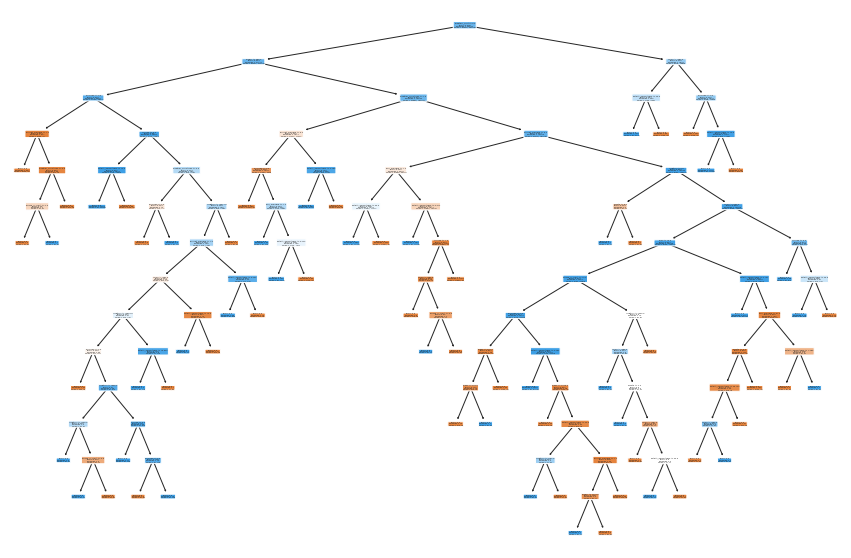

In [57]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X_train.columns,
          class_names=None, 
          filled=True, impurity=True, 
          rounded=True)

fig.savefig('/Users/robertreynoso/Desktop/phase_03_project/imgs/rf_tree.png')

# Inspecting feature importance

In [ ]:
importances = rf.feature_importances_

x = pd.DataFrame(sorted(list(zip(rf.feature_importances_, X_train.columns))))
x

In [50]:
feature_names = X_train.columns

In [51]:
forest_importances = pd.Series(importances, index=feature_names)


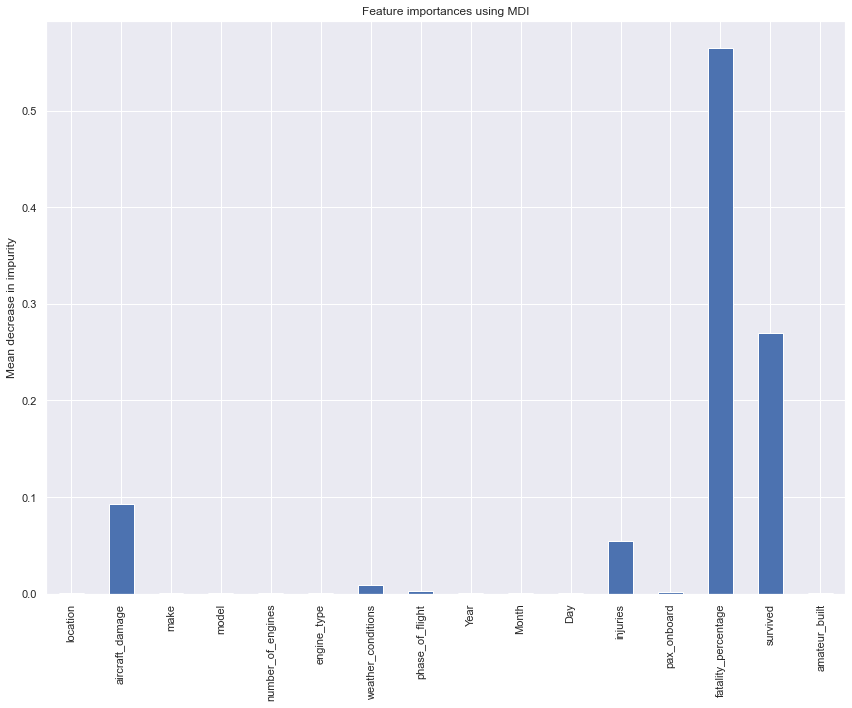

In [58]:
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

fig.savefig('/Users/robertreynoso/Desktop/phase_03_project/imgs/rf_feauture_imp.png')

In [48]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances_2 = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 3.990 seconds


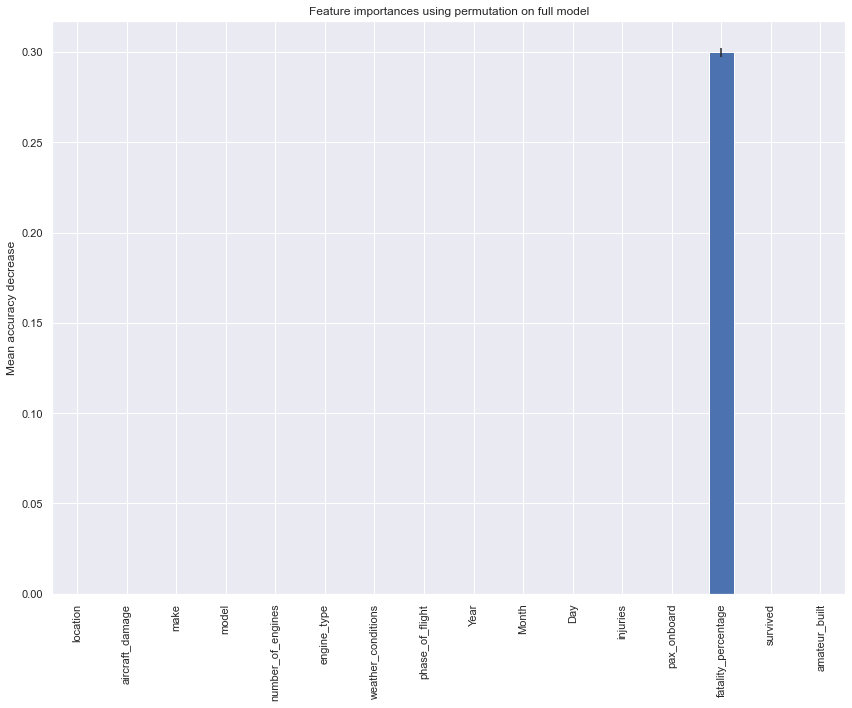

In [59]:
fig, ax = plt.subplots()
forest_importances_2.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

fig.savefig('/Users/robertreynoso/Desktop/phase_03_project/imgs/rf_feauture_imp_perm.png')

# Visualize Confusion Matrix for X_train, X_test

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_test = 

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

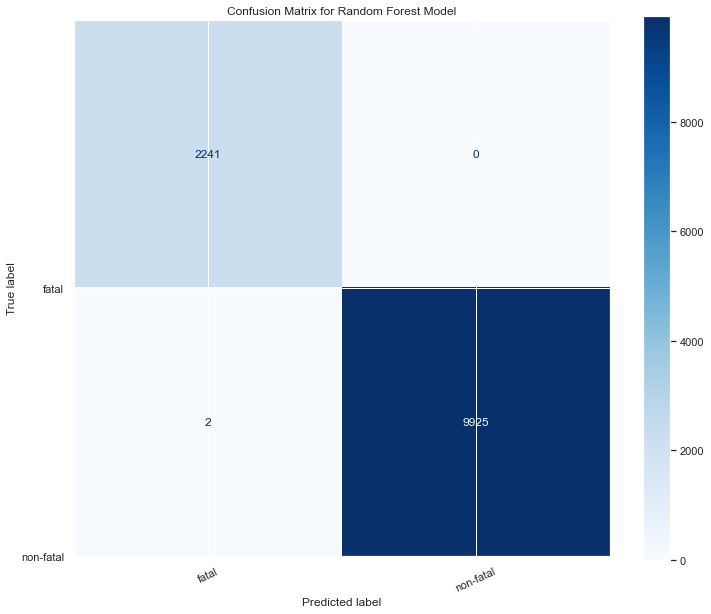

<Figure size 864x720 with 0 Axes>

In [21]:
from sklearn.metrics import plot_confusion_matrix



# Visualize your confusion matrix
plot_confusion_matrix(rf, X_test, y_test,
                     cmap=plt.cm.Blues)

# Add labels to the plot
class_names = ['fatal', 'non-fatal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

plt.show()

plt.savefig('/Users/robertreynoso/Desktop/phase_03_project/imgs/rf_confus_matrix.png')

In [24]:
rf_results[1]

col_0,0,1
target,,
0,2241,0
1,2,9925


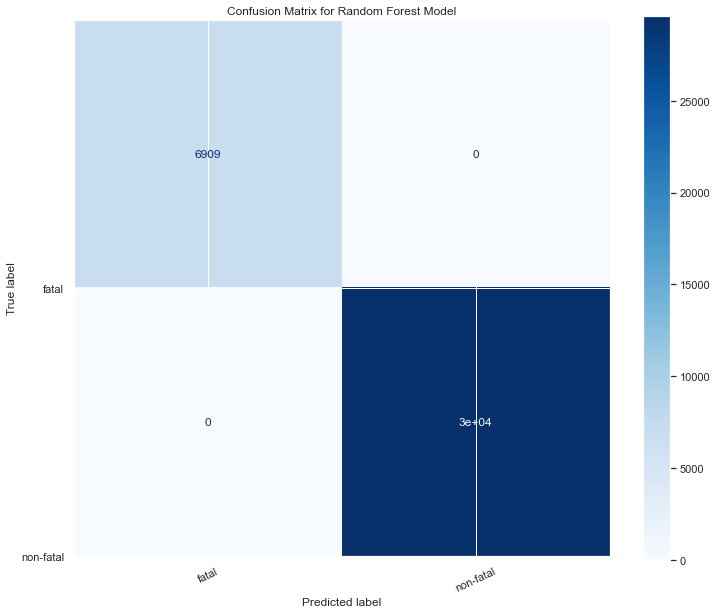

<Figure size 864x720 with 0 Axes>

In [13]:
from sklearn.metrics import plot_confusion_matrix



# Visualize your confusion matrix
plot_confusion_matrix(rf, X_train, y_train,
                     cmap=plt.cm.Blues)

# Add labels to the plot
class_names = ['fatal', 'non-fatal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

plt.show()

plt.savefig('/Users/robertreynoso/Desktop/phase_03_project/imgs/train_rf_confus_matrix.png')